In [1]:
# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time
import warnings

import dill
import matplotlib.pyplot as plt

warnings.simplefilter(action="ignore", category=FutureWarning)

import numpy as np

from collab.utils import find_repo_root

root = find_repo_root()
from collab.foraging import random_hungry_followers as rhf
from collab.foraging.toolkit.velocity import add_velocities_to_foragers

logging.basicConfig(format="%(message)s", level=logging.INFO)

# users can ignore smoke_test -- it's for automatic testing on GitHub, to make sure the notebook runs on future updates to the repository
smoke_test = "CI" in os.environ
num_frames = 5 if smoke_test else 50
num_svi_iters = 10 if smoke_test else 1000
num_samples = 10 if smoke_test else 1000


notebook_starts = time.time()

In [2]:
random.seed(23)
np.random.seed(23)

random_foragers_sim = rhf.RandomForagers(
    grid_size=40,
    probabilities=[1, 2, 3, 2, 1, 2, 3, 2, 1],
    num_foragers=3,
    num_frames=num_frames,
    num_rewards=15,
    grab_range=3,
)

random_foragers_sim()

random_foragers_sim.foragersDF.head()

foragers = random_foragers_sim.foragers
len(foragers)

add_velocities_to_foragers(foragers)

display(foragers[0])

,x,y,time,forager,type,velocity_x,velocity_y
0,20.0,23.0,1,1,random,0.0,0.0
1,24.0,23.0,2,1,random,4.0,0.0
2,26.0,25.0,3,1,random,2.0,2.0
3,24.0,28.0,4,1,random,-2.0,3.0
4,22.0,26.0,5,1,random,-2.0,-2.0
5,24.0,23.0,6,1,random,2.0,-3.0
6,21.0,22.0,7,1,random,-3.0,-1.0
7,20.0,25.0,8,1,random,-1.0,3.0
8,21.0,22.0,9,1,random,1.0,-3.0
9,20.0,20.0,10,1,random,-1.0,-2.0


In [4]:
sampling_rate = 0.01

path = os.path.join(
    root,
    f"data/foraging/central_park_birds_cleaned_2022/central_park_objects_sampling_rate_{sampling_rate}.pkl",
)

with open(path, "rb") as file:
    central_park_objects = dill.load(file)

ducks_objects = central_park_objects[0]
ducks_50 = ducks_objects[50]
add_velocities_to_foragers(ducks_50.foragers)

display(ducks_50.foragers[5])

,x,y,time,forager,velocity_x,velocity_y
1839,89.0,14.0,55,6,0.0,0.0
1875,88.0,14.0,56,6,-1.0,0.0
1920,87.0,15.0,57,6,-1.0,1.0
1965,86.0,16.0,58,6,-1.0,1.0
2001,85.0,17.0,59,6,-1.0,1.0
...,...,...,...,...,...,...
6812,2.0,58.0,172,6,0.0,0.0
6844,2.0,58.0,173,6,0.0,0.0
6884,3.0,58.0,174,6,1.0,0.0
6924,3.0,58.0,175,6,0.0,0.0


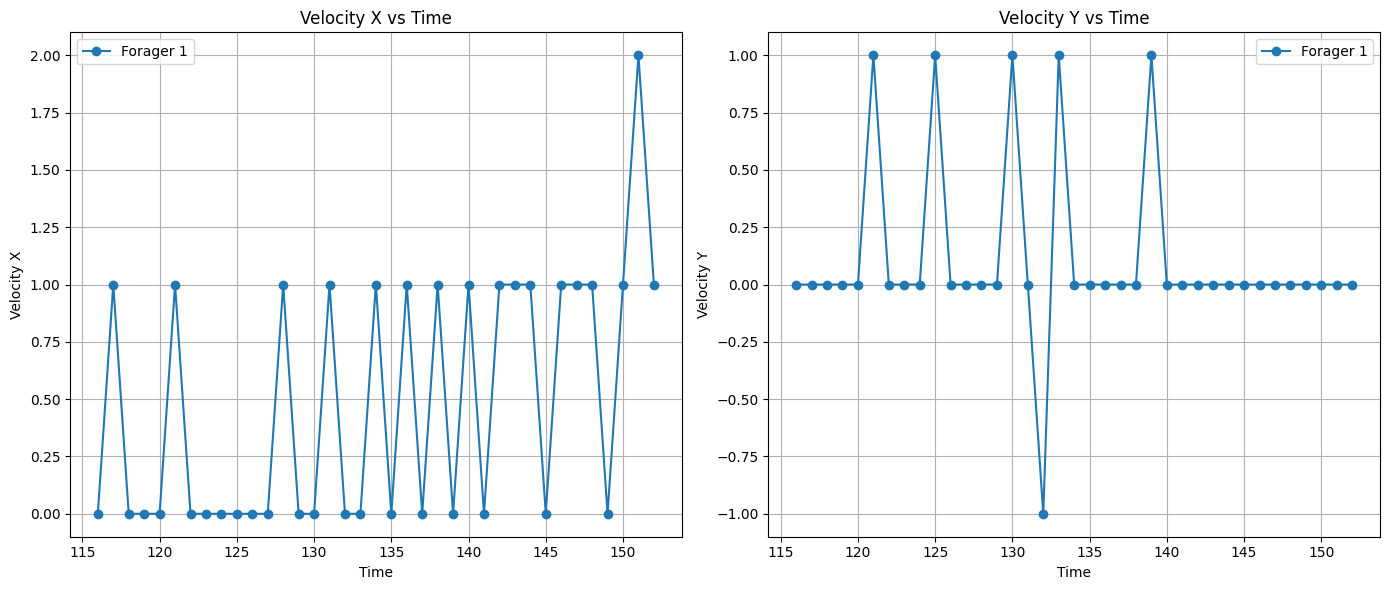

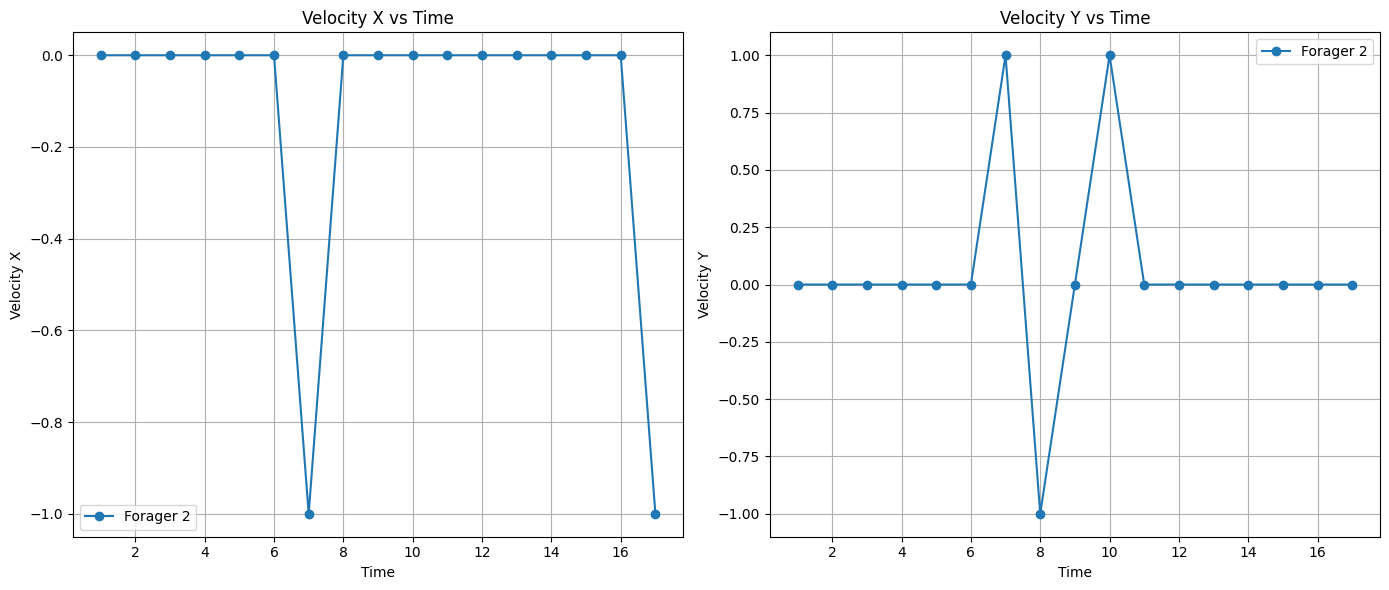

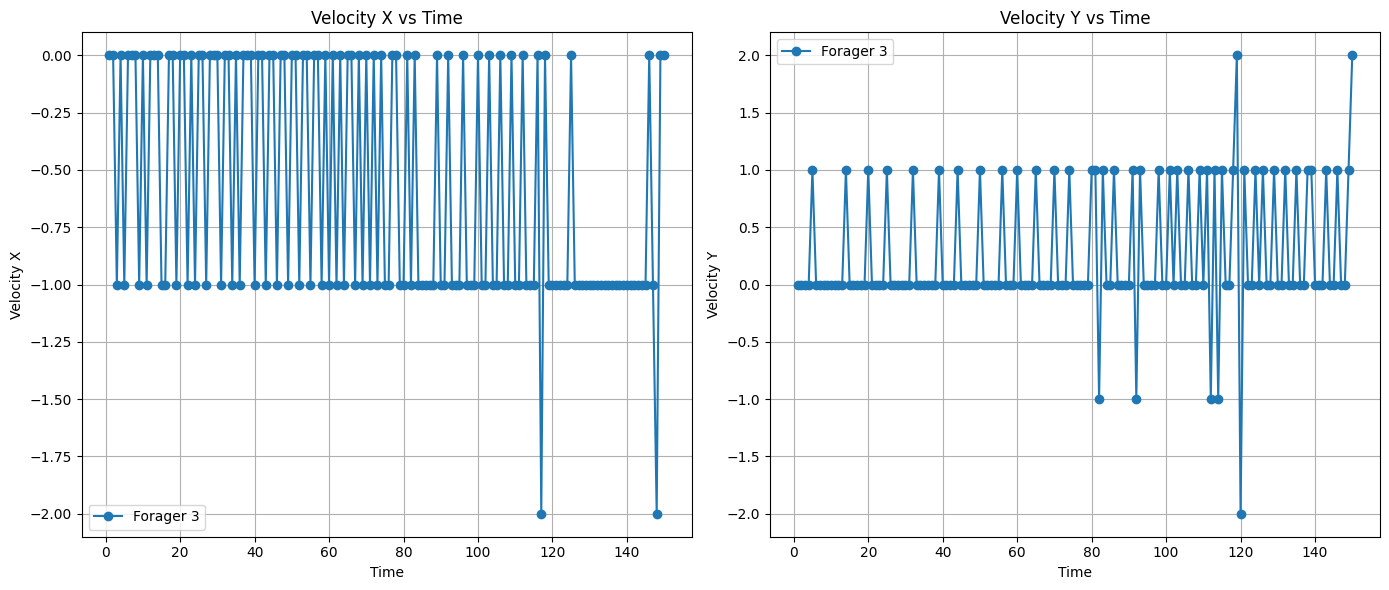

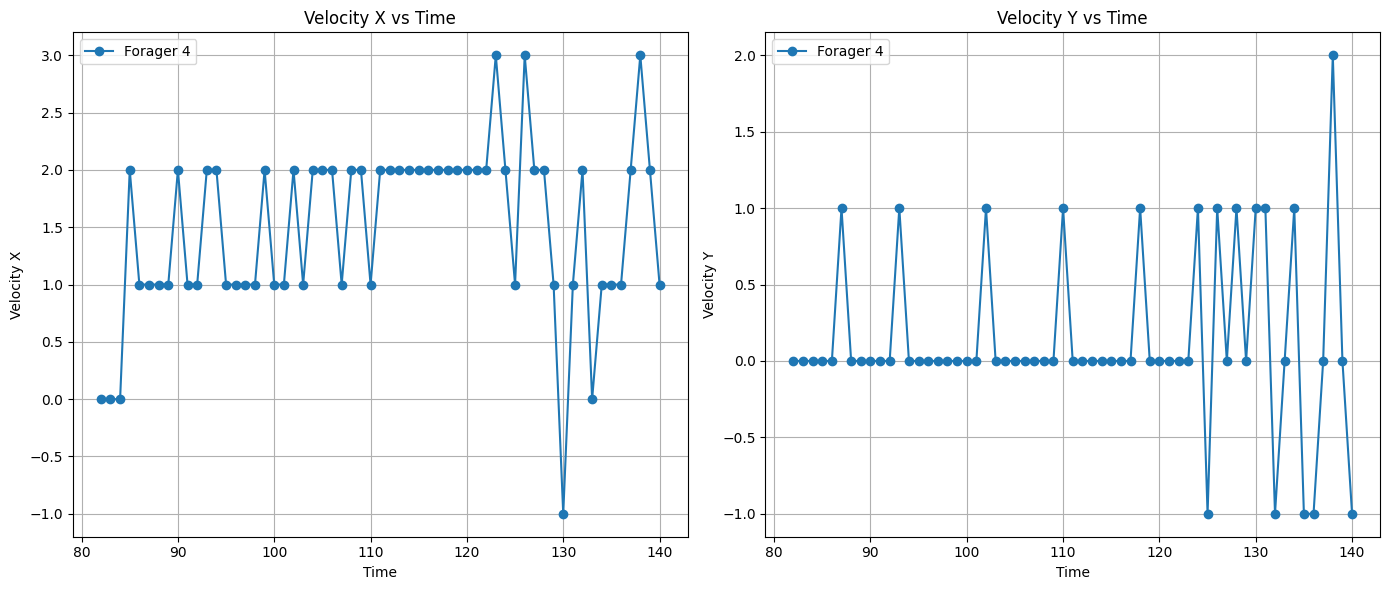

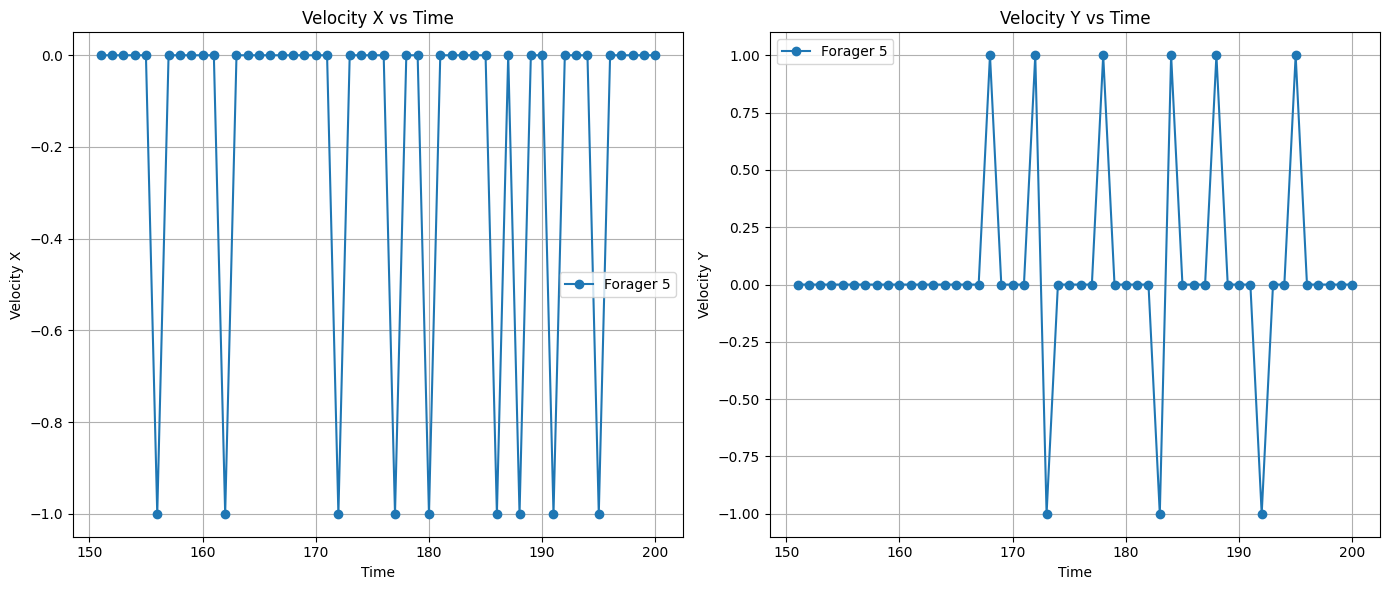

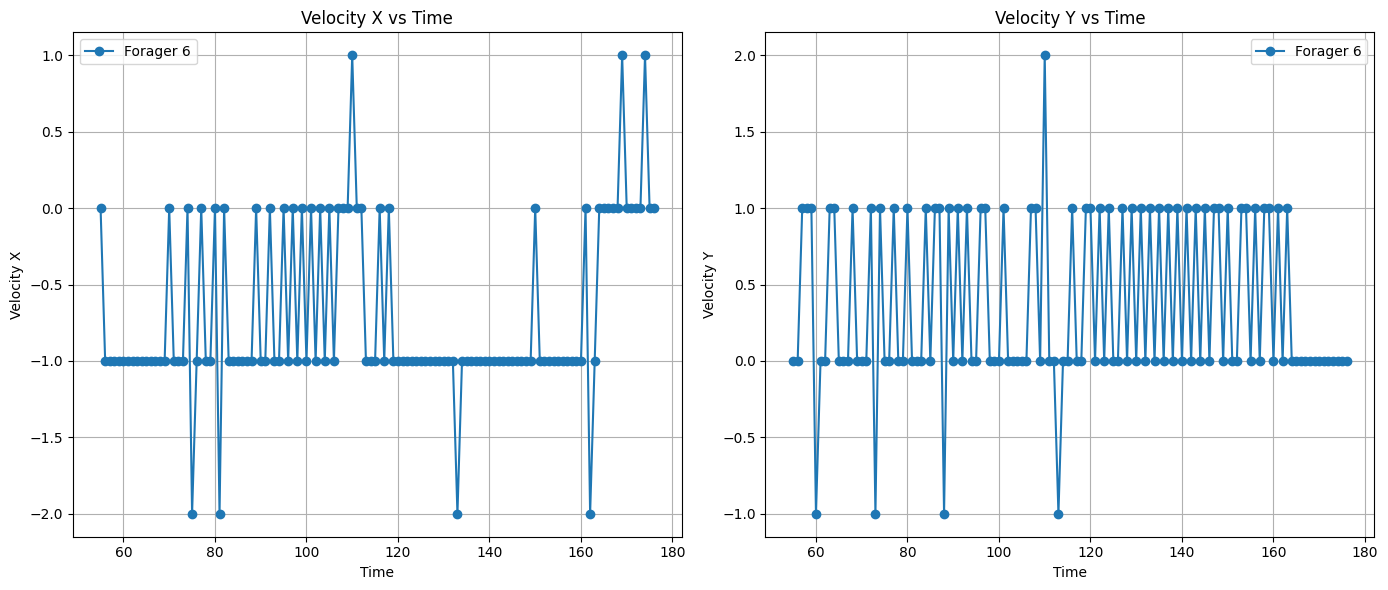

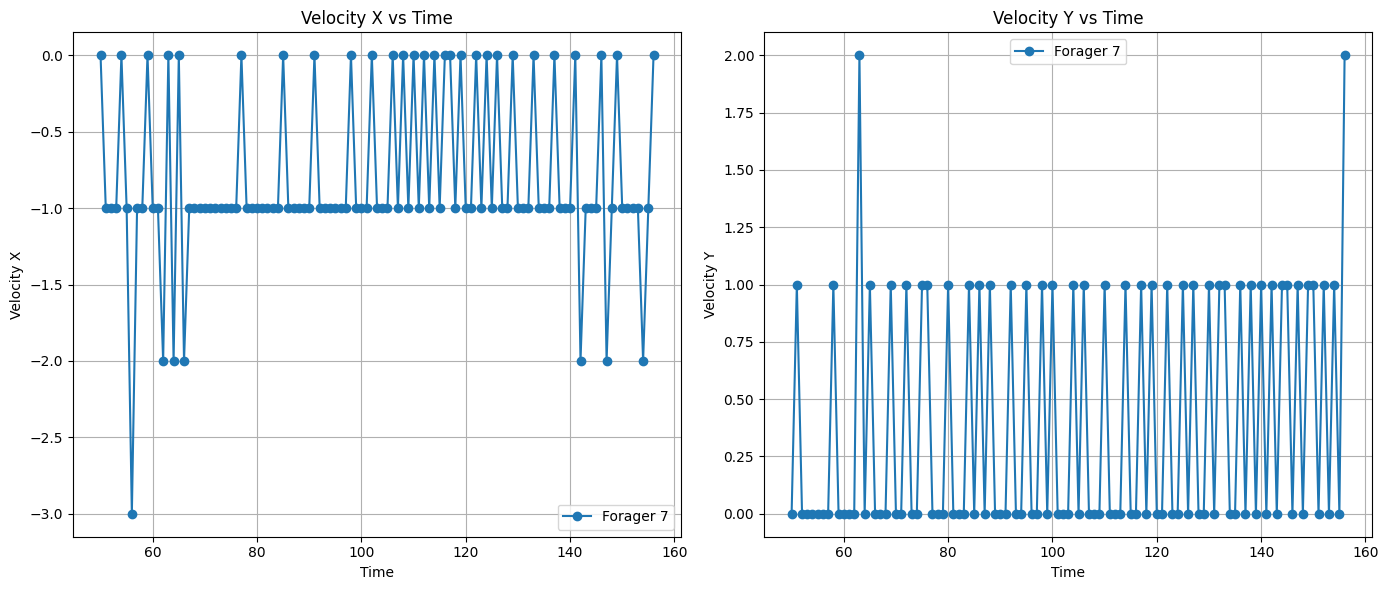

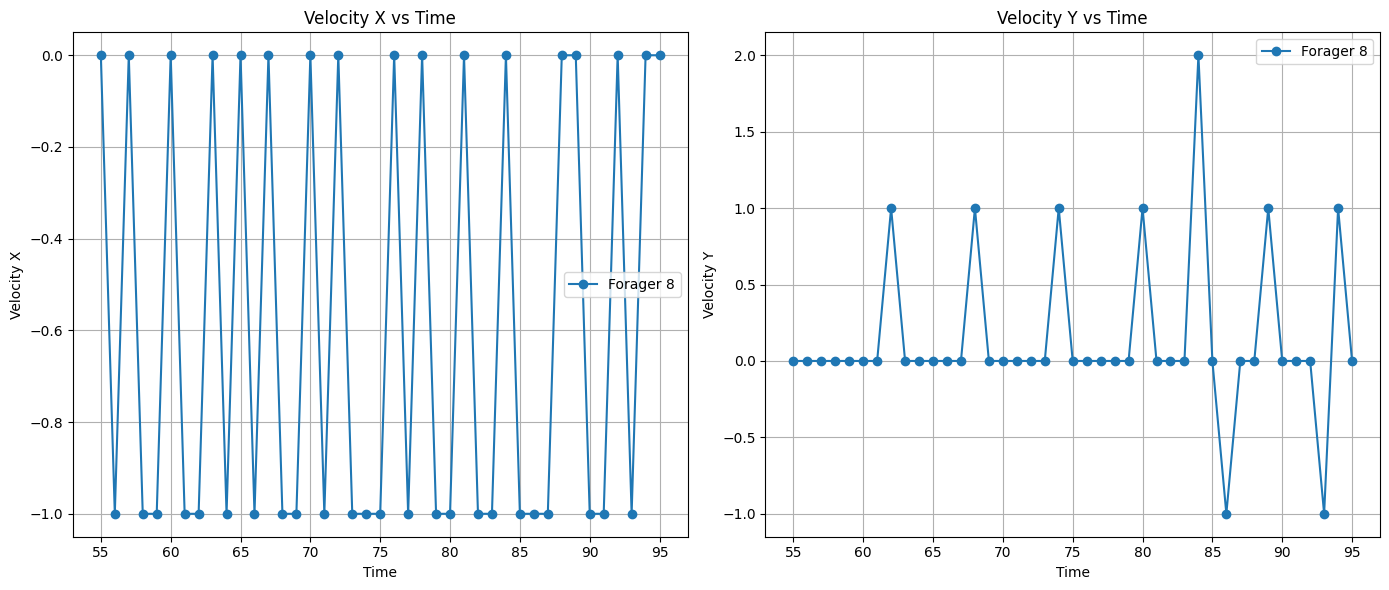

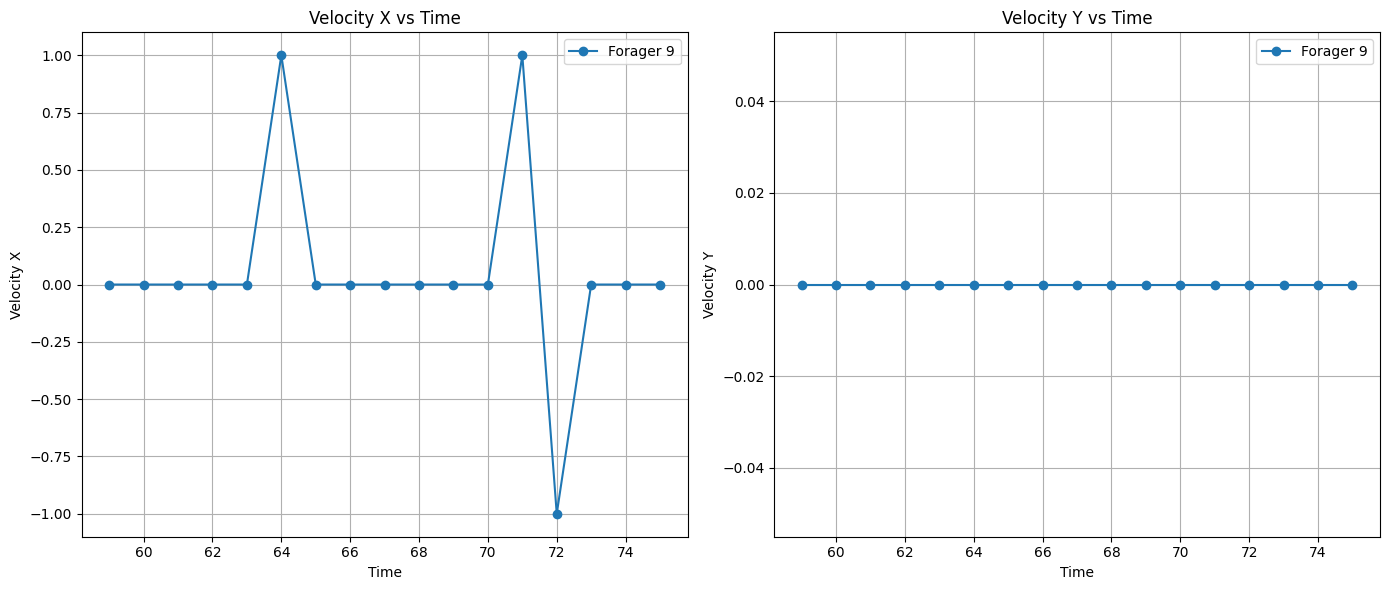

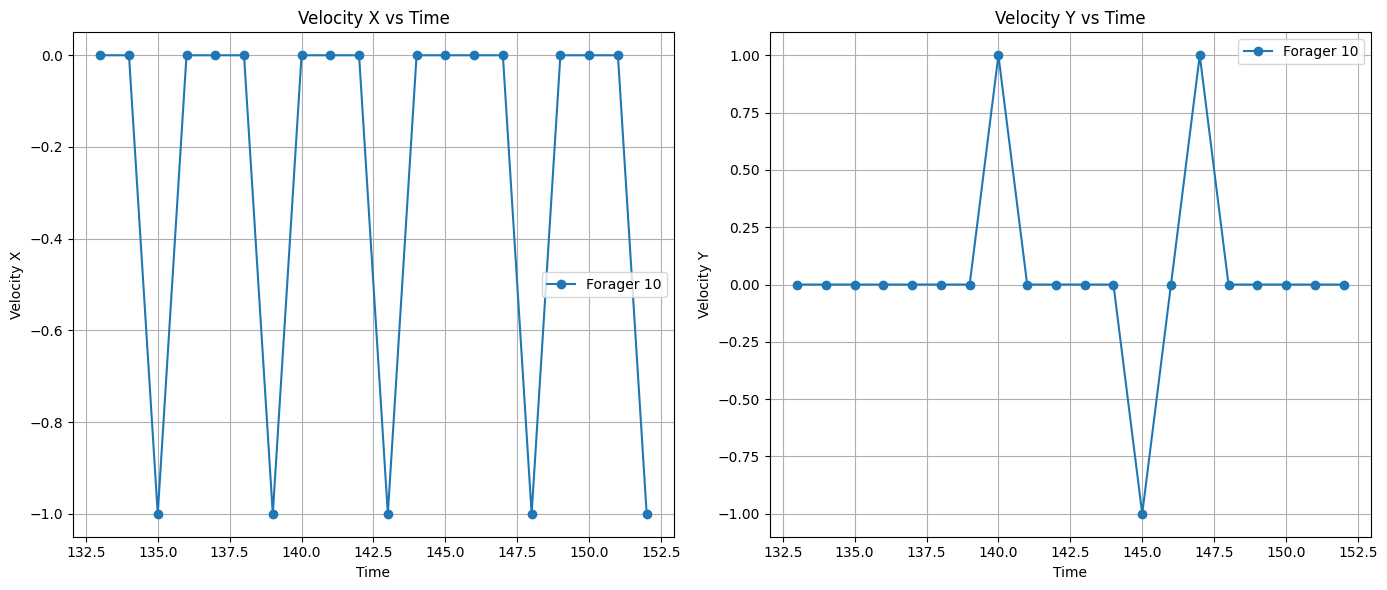

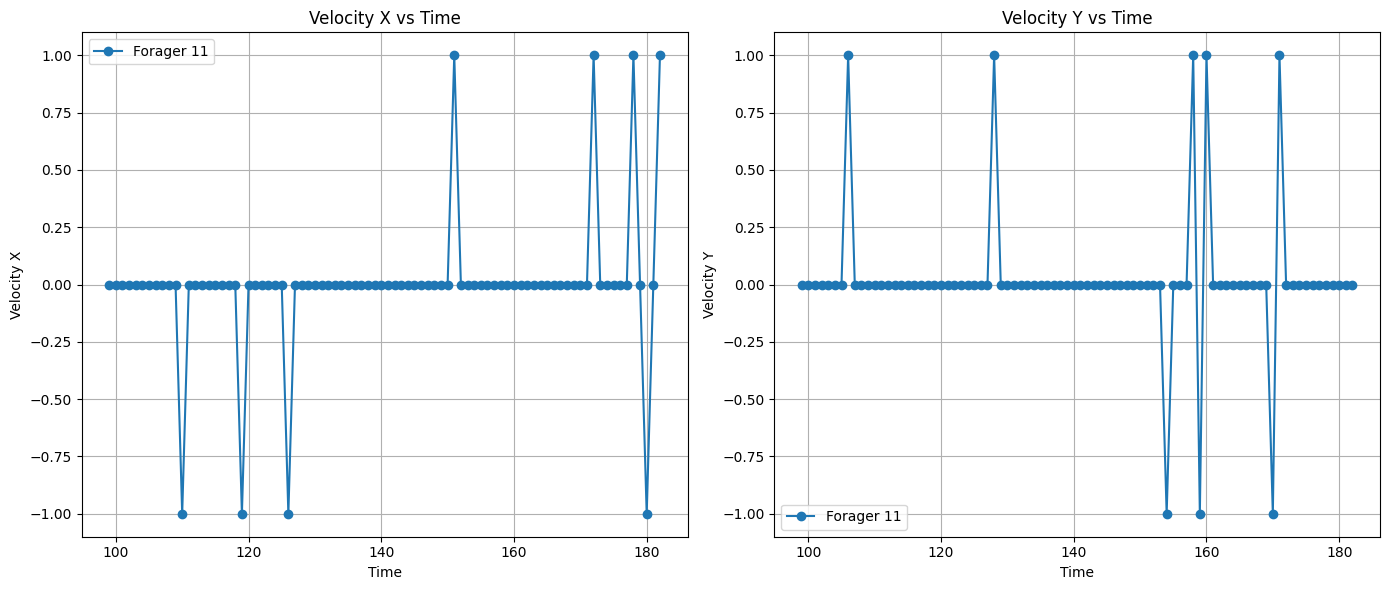

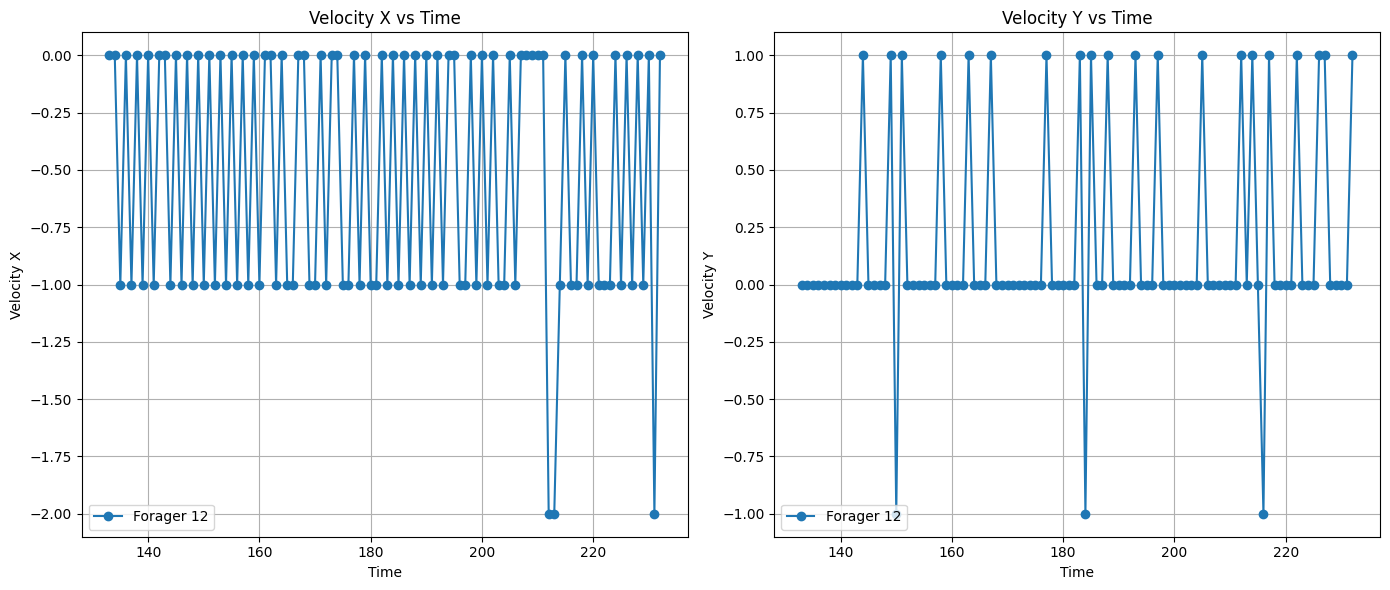

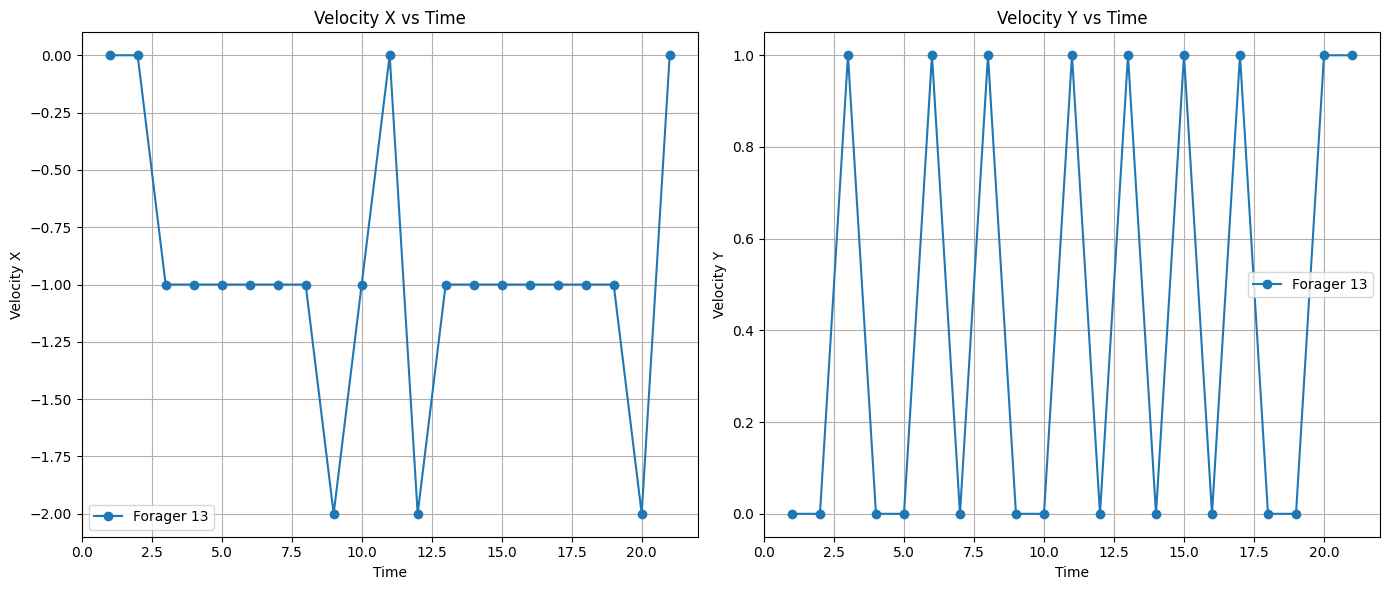

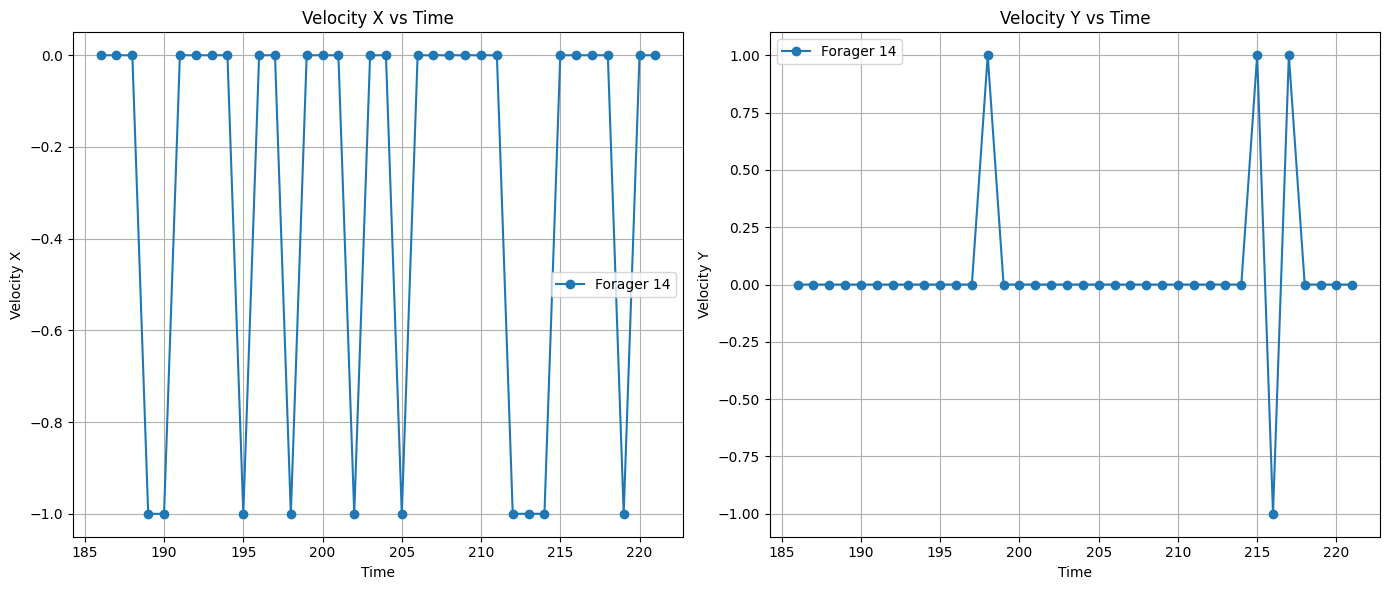

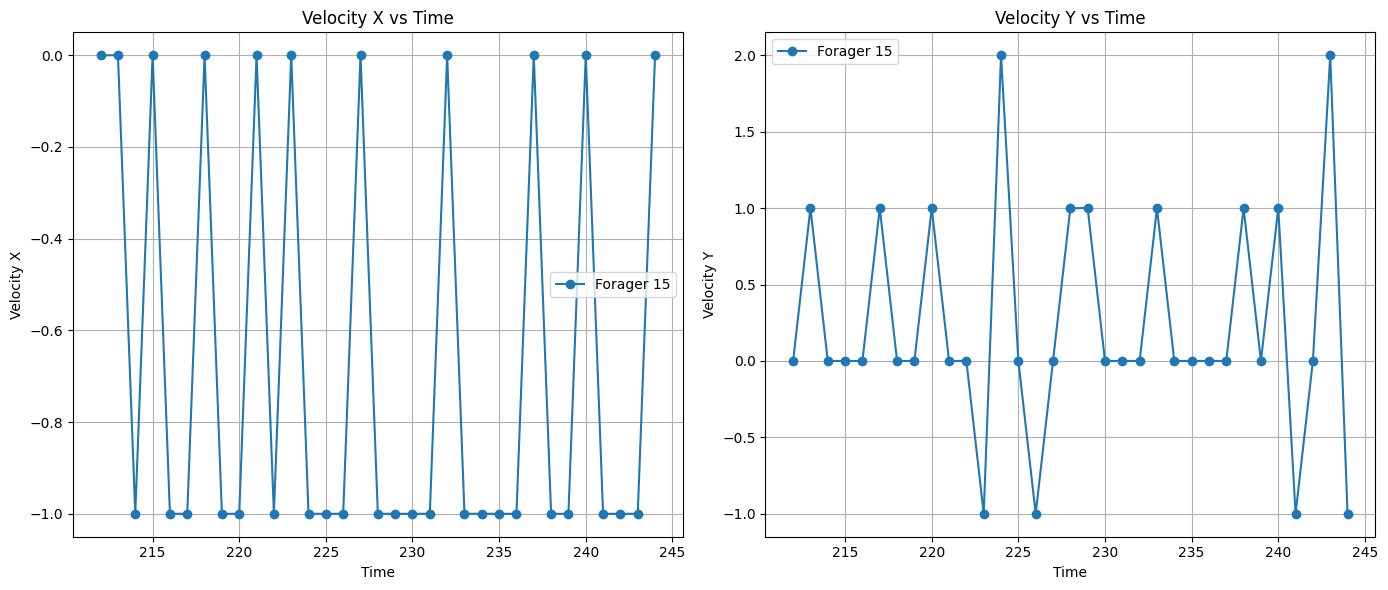

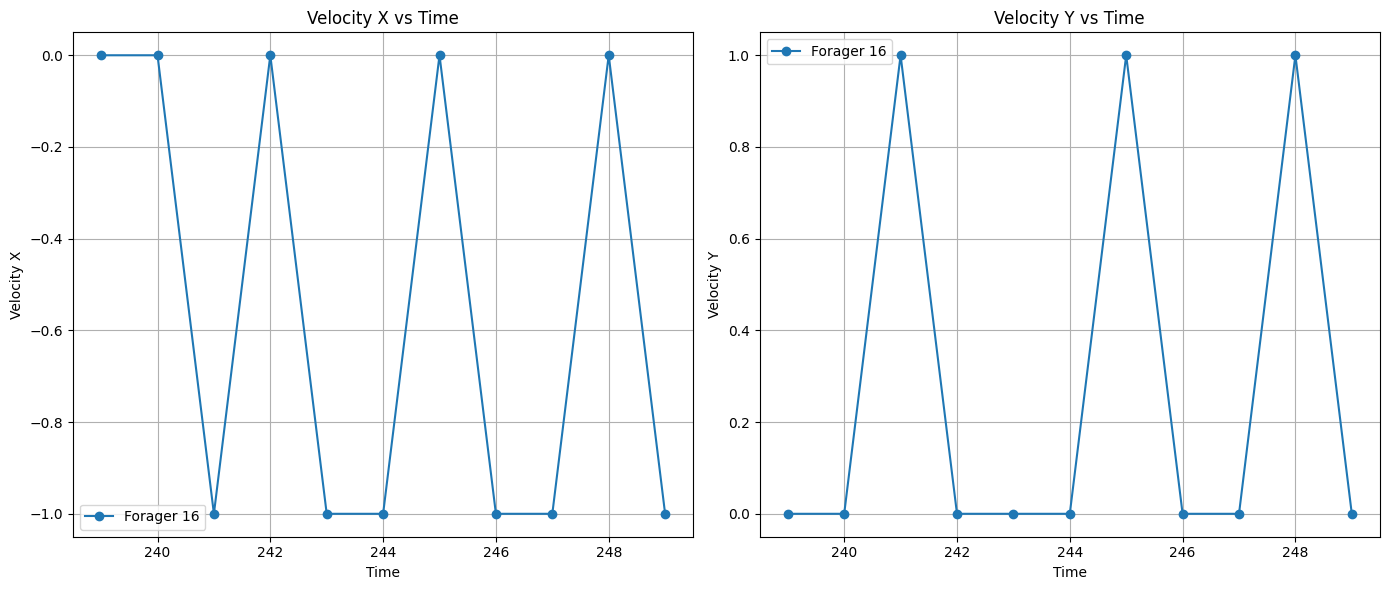

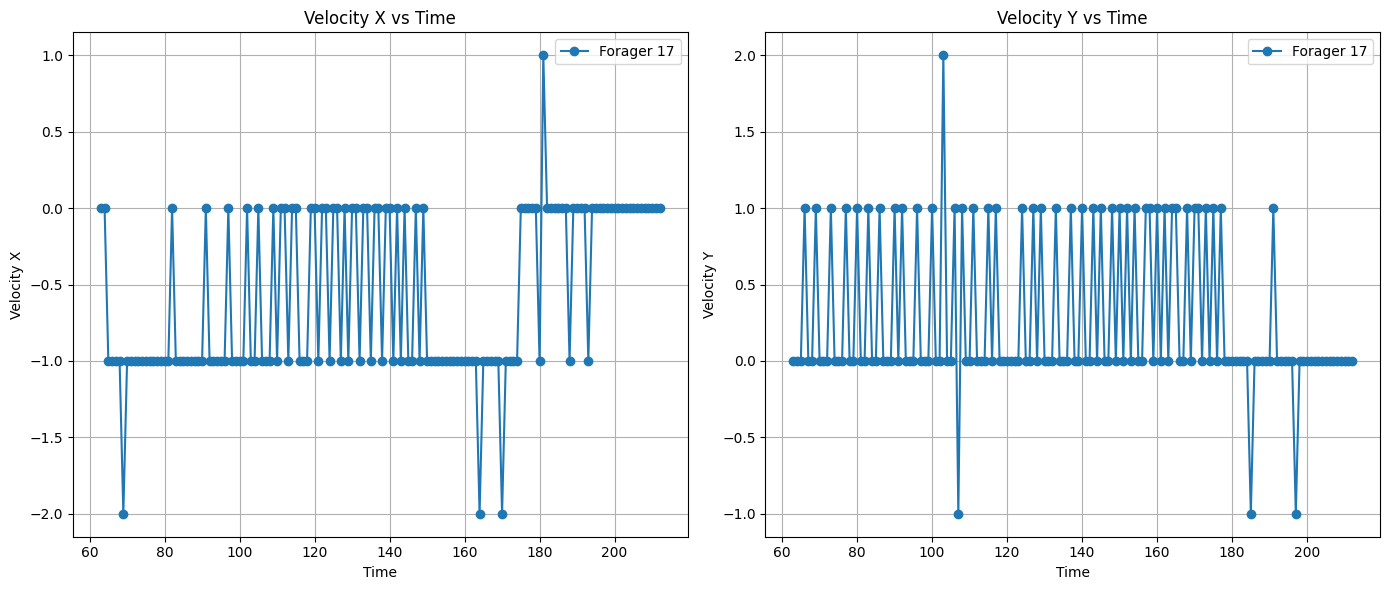

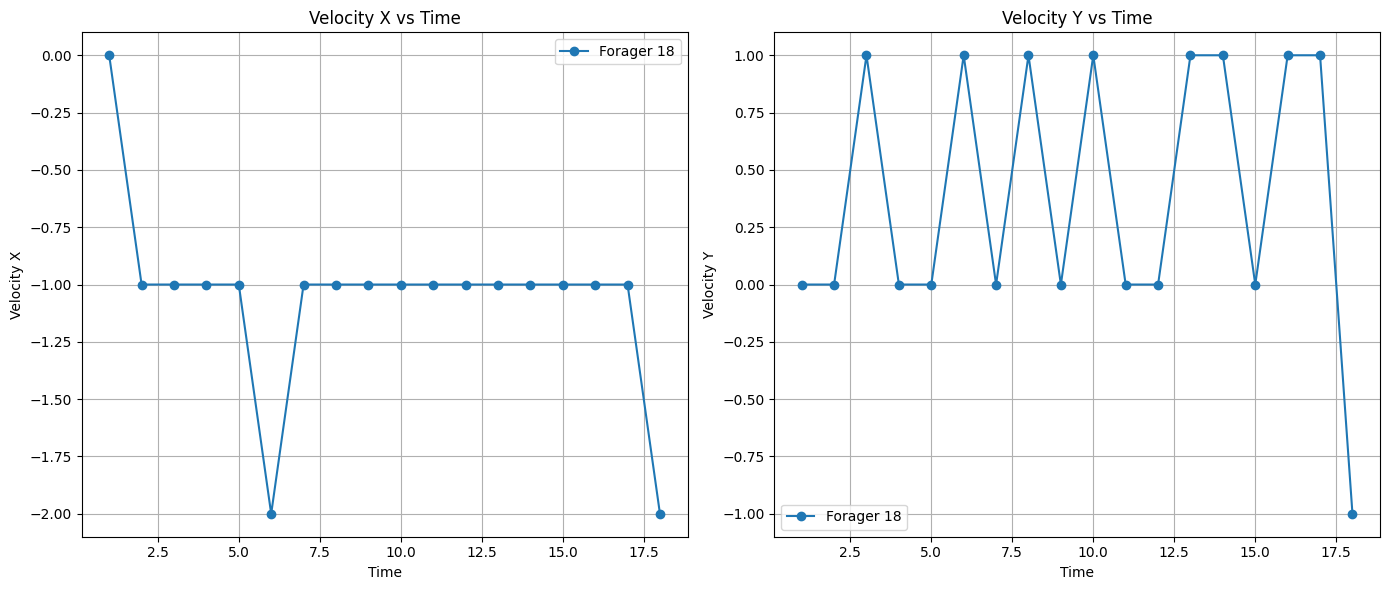

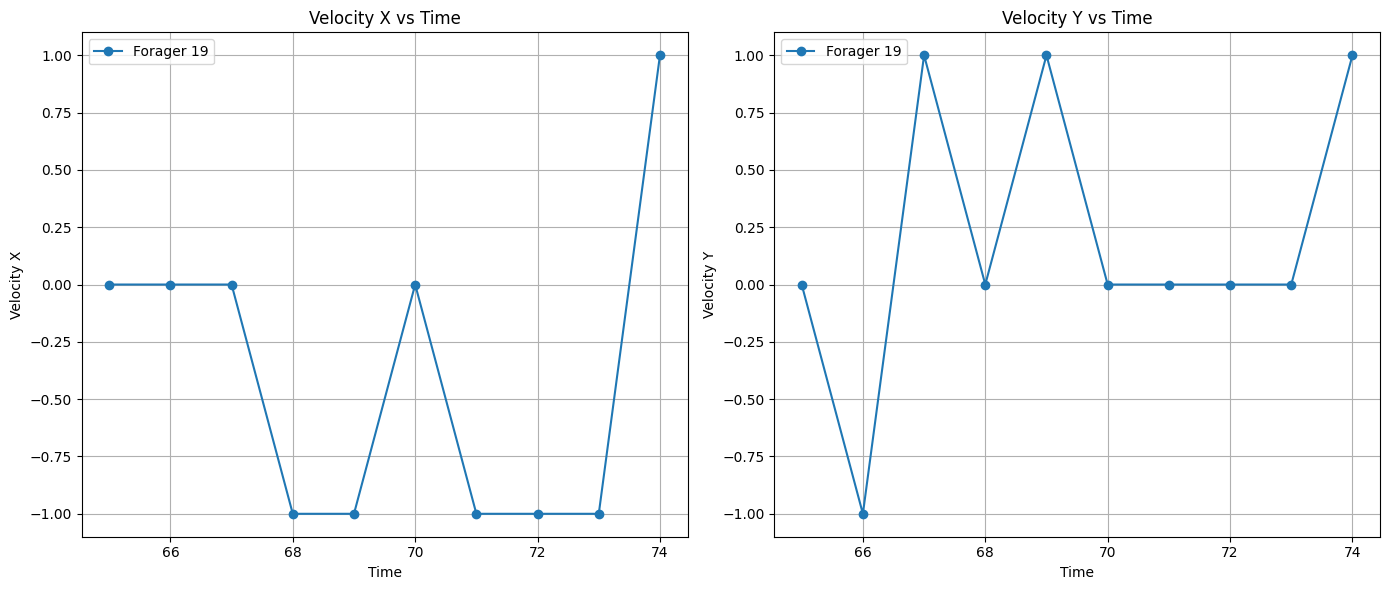

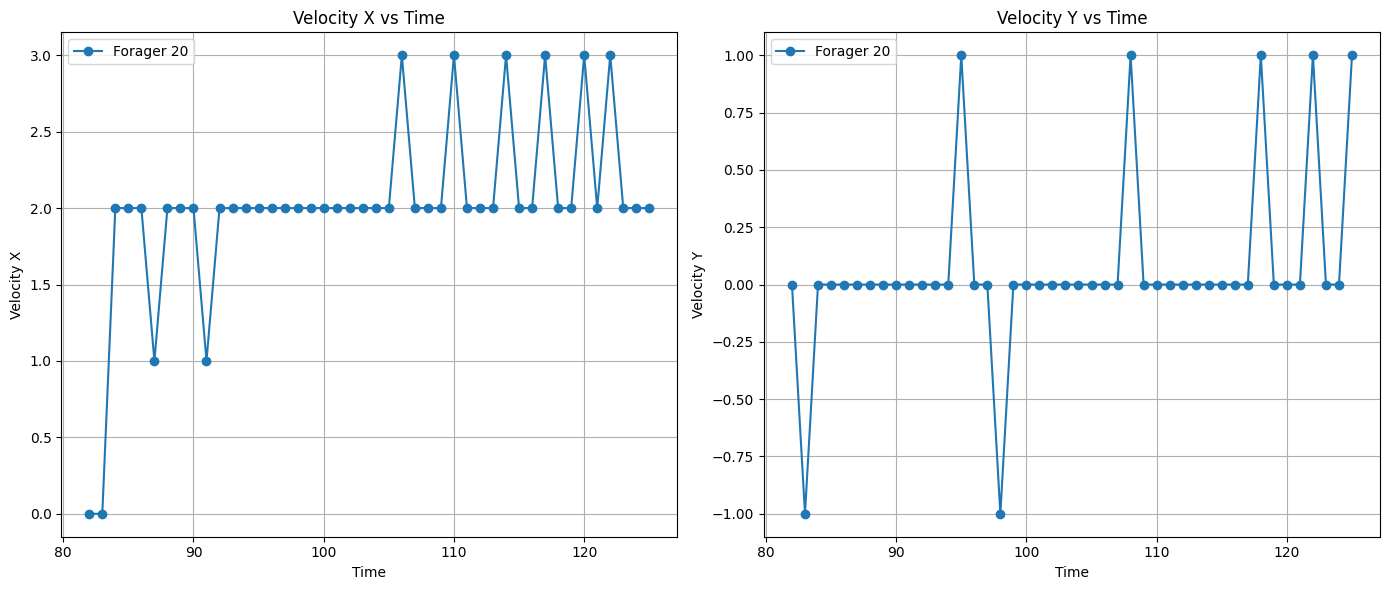

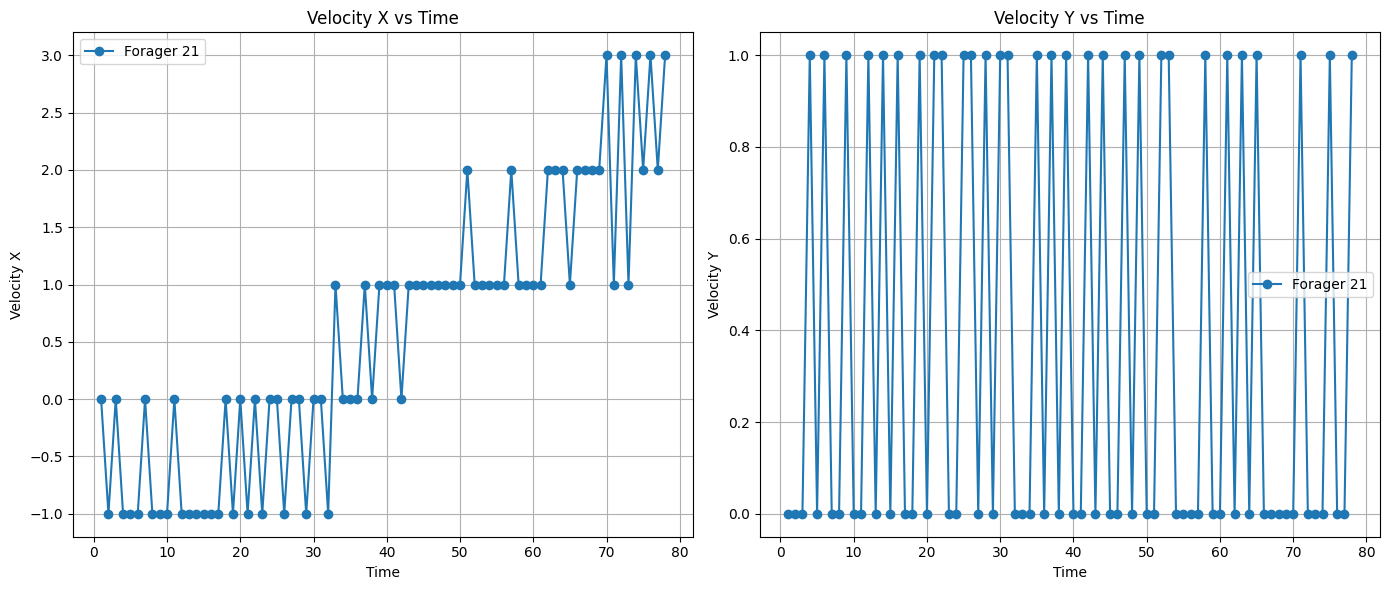

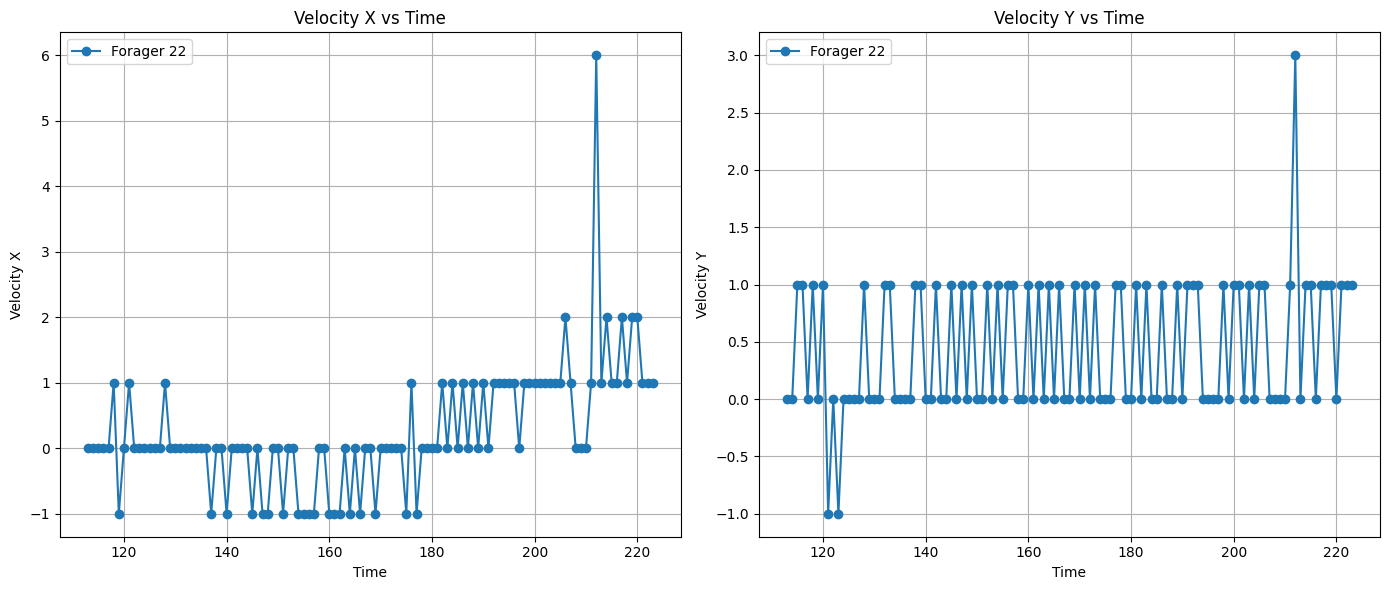

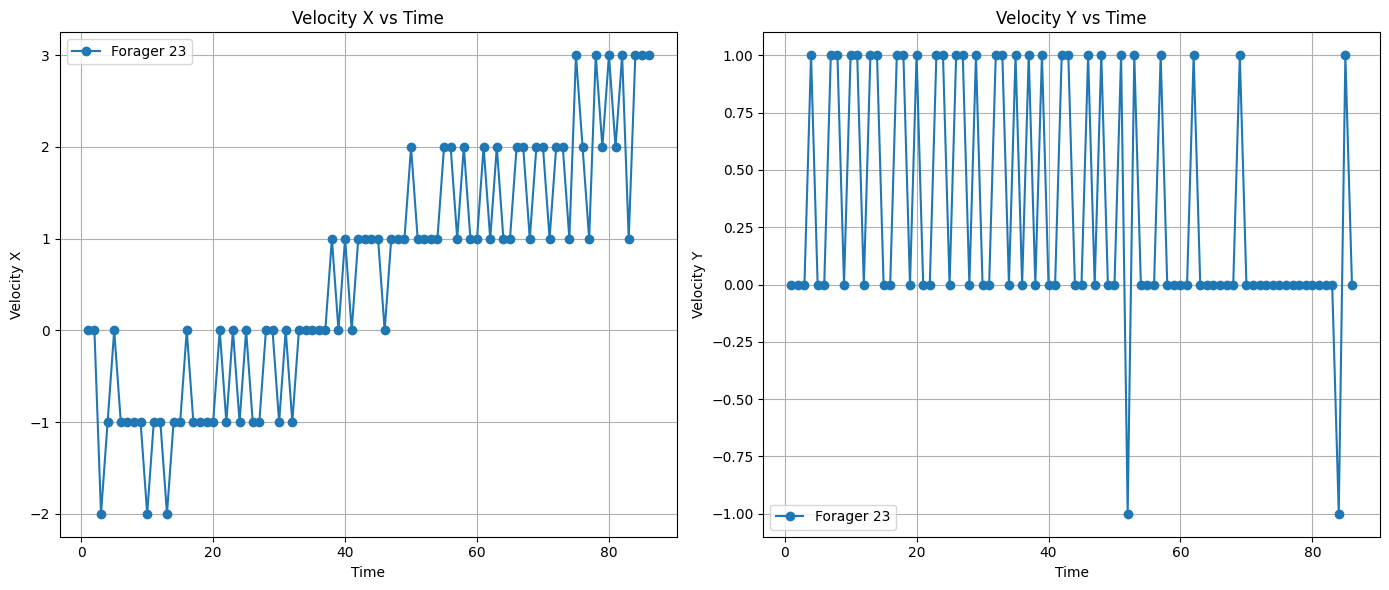

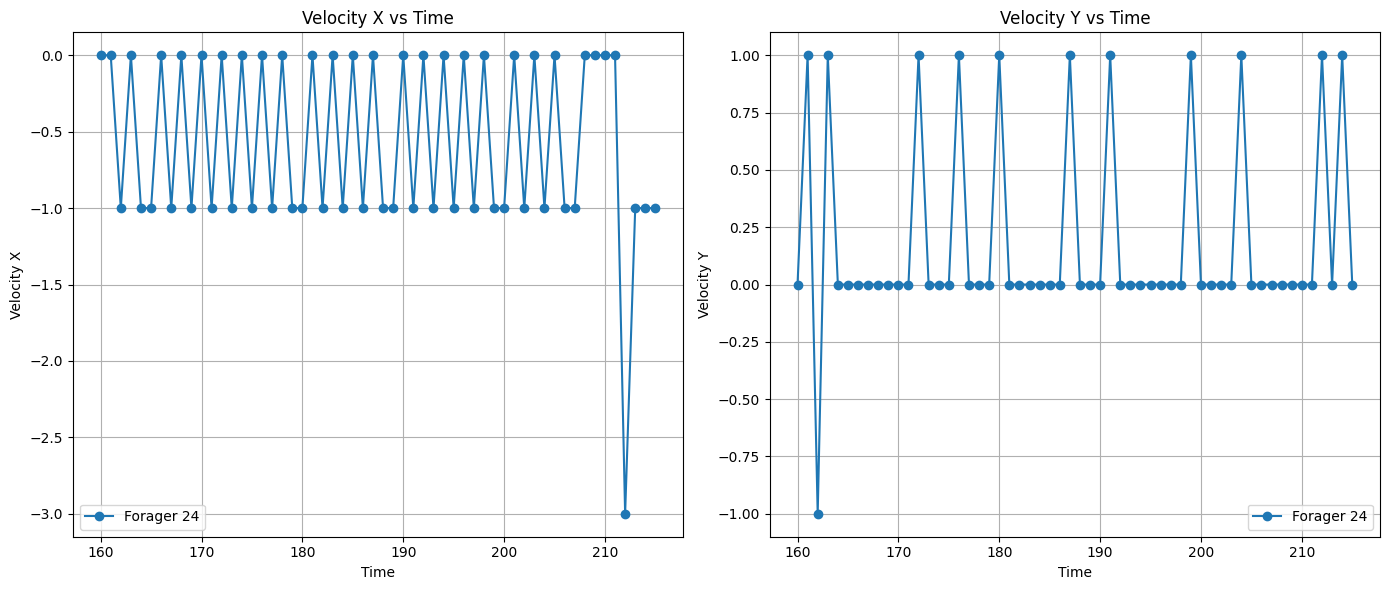

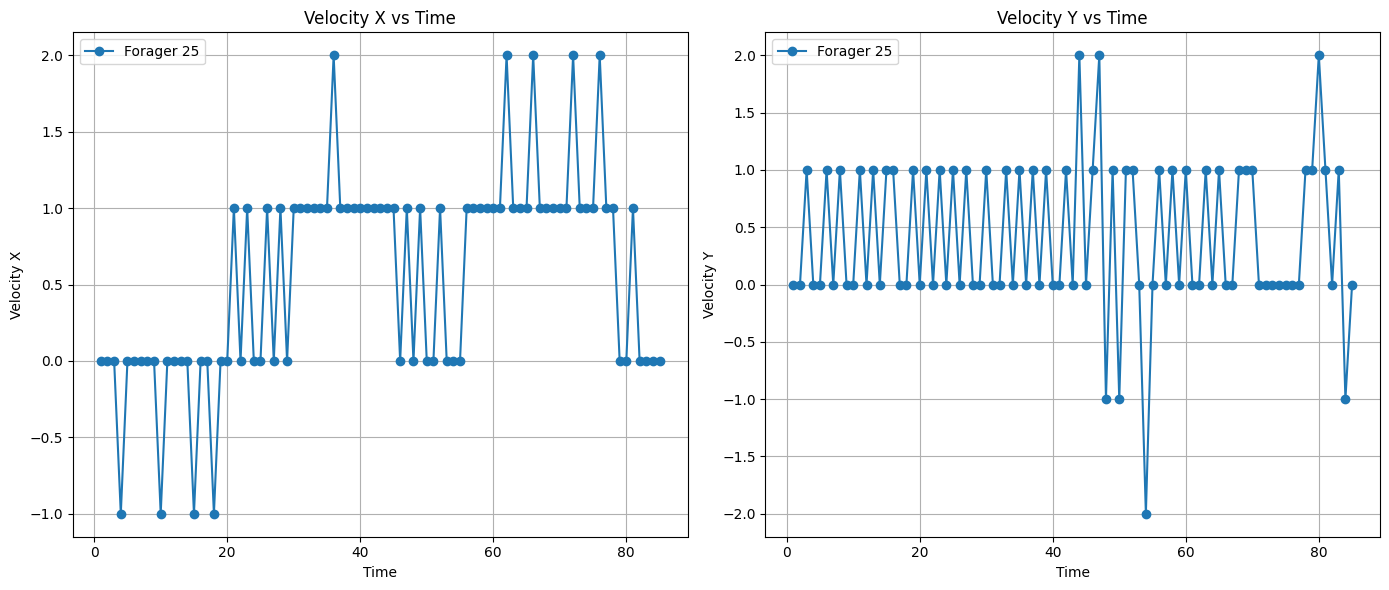

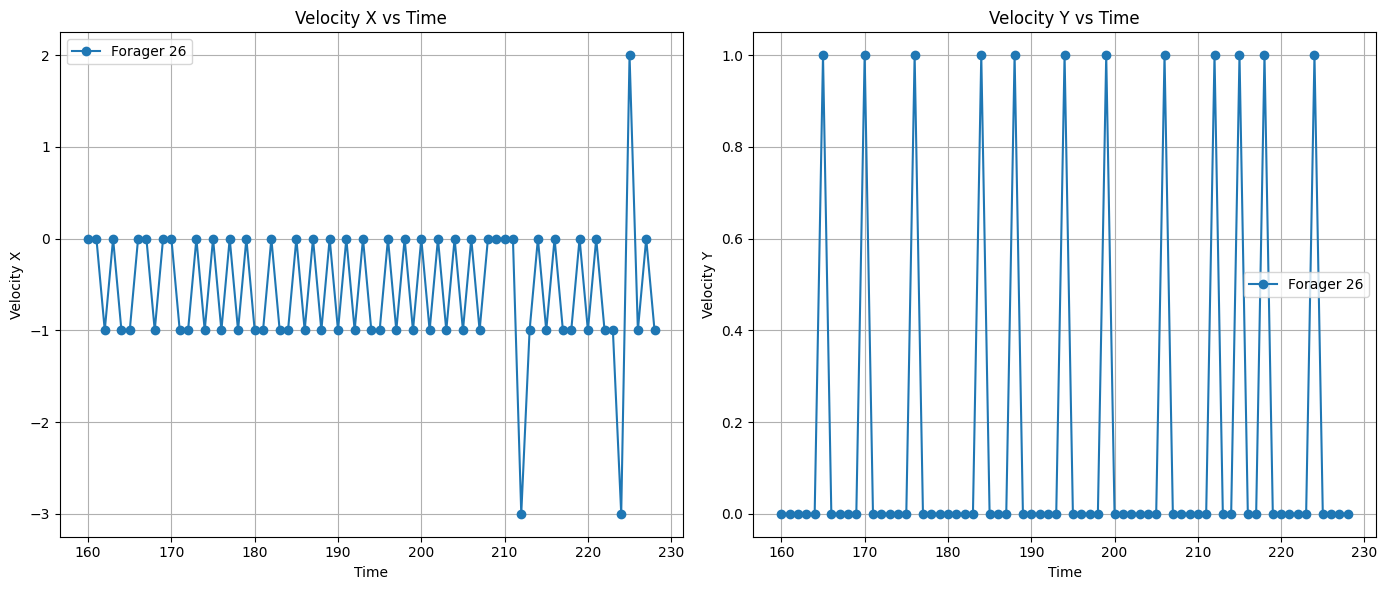

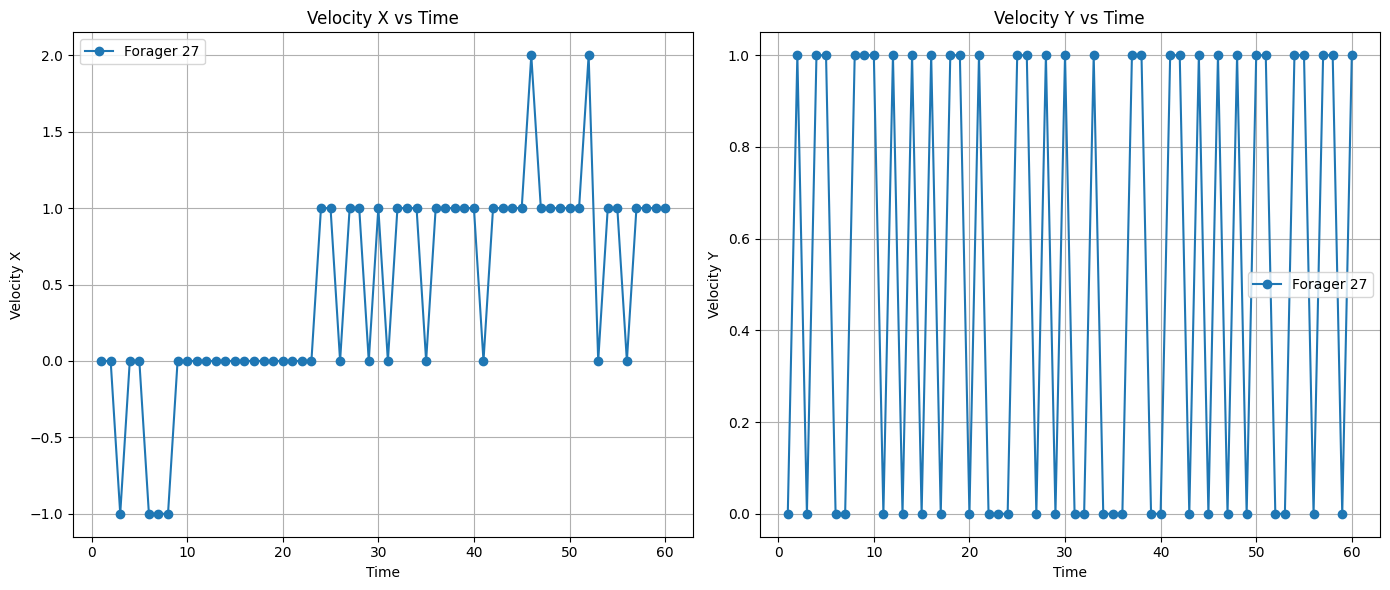

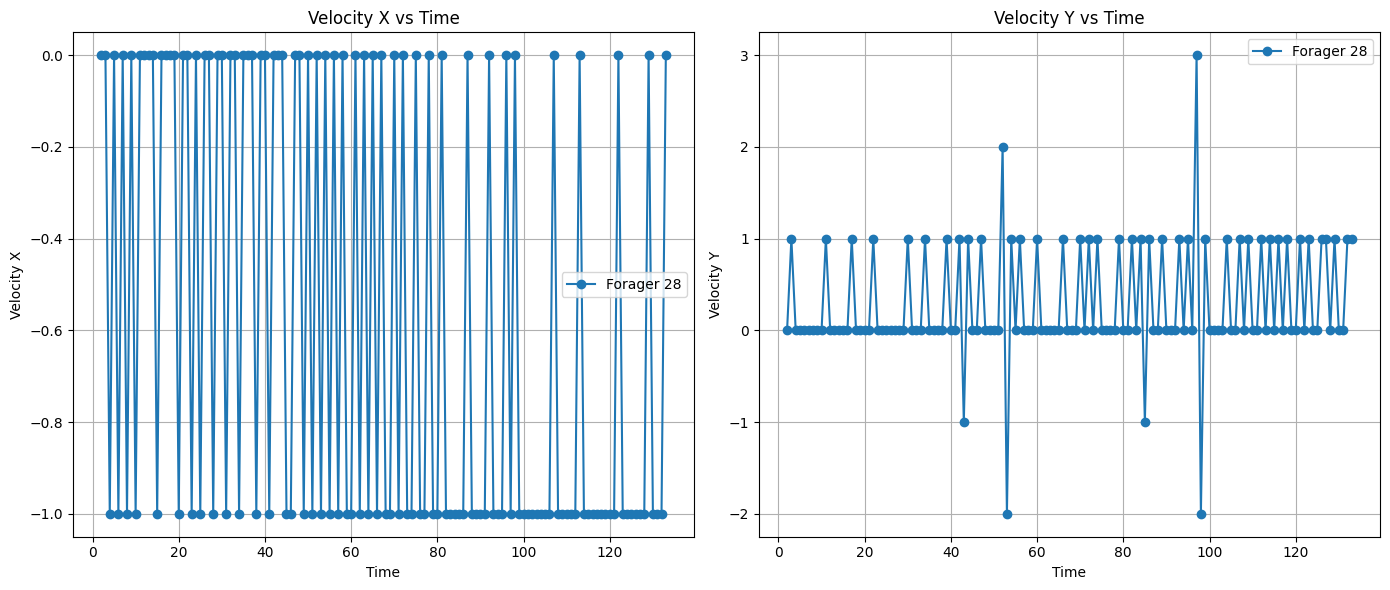

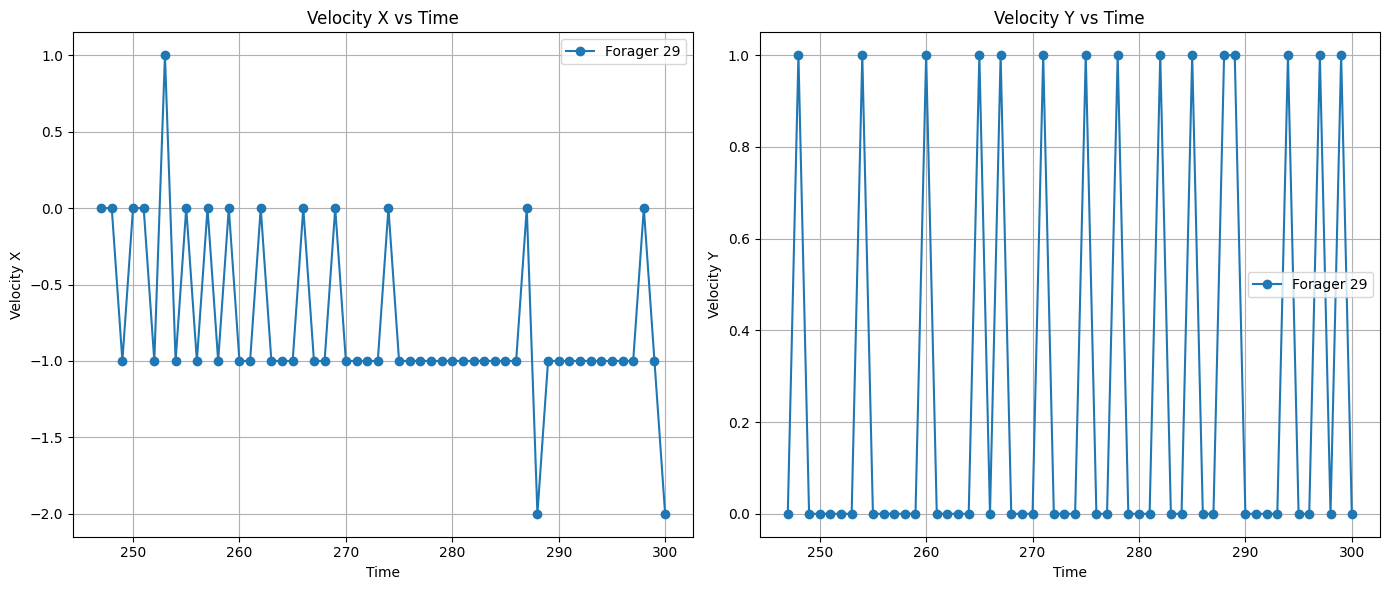

In [5]:
# sanity check, plot velocities against time
# unexpectedly large values should be investigated

for forager in ducks_50.foragers:

    df = forager

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    for forager, group in df.groupby("forager"):
        plt.plot(
            group["time"], group["velocity_x"], marker="o", label=f"Forager {forager}"
        )
    plt.xlabel("Time")
    plt.ylabel("Velocity X")
    plt.title("Velocity X vs Time")
    plt.legend()
    plt.grid(True)

    # Plot velocity_y vs. time
    plt.subplot(1, 2, 2)
    for forager, group in df.groupby("forager"):
        plt.plot(
            group["time"], group["velocity_y"], marker="o", label=f"Forager {forager}"
        )
    plt.xlabel("Time")
    plt.ylabel("Velocity Y")
    plt.title("Velocity Y vs Time")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()